**Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**Load Dataset**

In [3]:
df = pd.read_csv('../data/raw/Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


**Encoding the target feature**

In [4]:
df['Heart Disease'] = df['Heart Disease'].apply(lambda x: 1 if x == 'Presence' else 0)

**Separating the target and features**

In [5]:
X = df.drop(columns=['Heart Disease'])
y = df['Heart Disease']

## Train Test split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

### Why stratification is used

Stratification keeps the class proportions consistent across splits, making the baseline models more reliable. Stratification guarantees that both training and test sets contain approximately the same proportion of each class, so the model is trained and evaluated consistently.

## Training the model

In [7]:
lr = LogisticRegression(random_state=42, max_iter=500)
lr.fit(X_train, y_train)

C:\Users\semwa\anaconda3\envs\ML_Env\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


**Note**:

A convergence warning was observed while training Logistic Regression. This is likely due to features being on different scales. Feature scaling will be addressed in a later step.

## Model Prediction

In [8]:
y_pred = lr.predict(X_test)

### Accuracy

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 83.33%


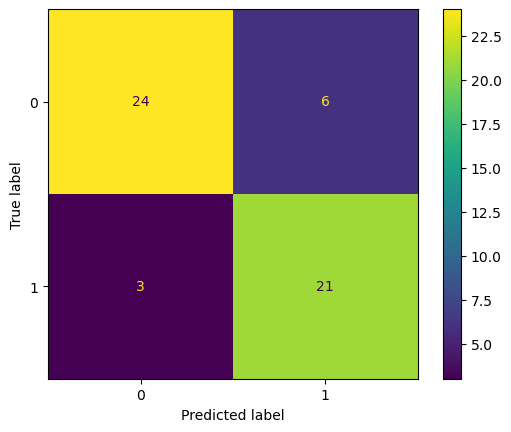

In [10]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

### Classification report

In [11]:
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.78      0.88      0.82        24

    accuracy                           0.83        54
   macro avg       0.83      0.84      0.83        54
weighted avg       0.84      0.83      0.83        54



## Evaluation

The baseline model achieves an accuracy of approximately **83.33%**, with **24 true negatives, 21 true positives, 6 false positives, and 3 false negatives**. It demonstrates strong performance on both classes, especially in identifying positive cases, with a **recall of 88%** and **precision of 78%** for class 1. The **F1 score** for class 1 is around **82%**, indicating a good balance between precision and recall. The dataset appears balanced, and the model provides a solid foundation for further tuning and improvement.


## Baseline Summary

- Model: Logistic Regression
- Validation Accuracy: 83.33%
- Key Strength: High recall for heart disease cases
- Key Limitation: Some false positives and convergence warning due to unscaled features
